In [2]:
from scipy.io import loadmat

import os

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
networks = {}
measures = {}
for beta in np.arange(0,3.1,0.1):
   beta = round(beta,1)
   if beta in [0.0,1.0,2.0,3.0]:
      beta = round(beta)
   try:
      mat = loadmat(f'../data/ABDATA_N40_Beta{beta}_TMax5000.mat')
      networks[beta] = mat['Networks_Unique'][0].tolist()
      table = pd.read_csv(f'../data/ABDATA_N40_Beta{beta}_TMax5000.csv')
      table['plog'] = np.log(table['p'])
      measures[beta] = table
   except:
      pass

In [4]:
predictors = ['N','Lambda1','Lambda2','Mu','GrMedio','Entropia']

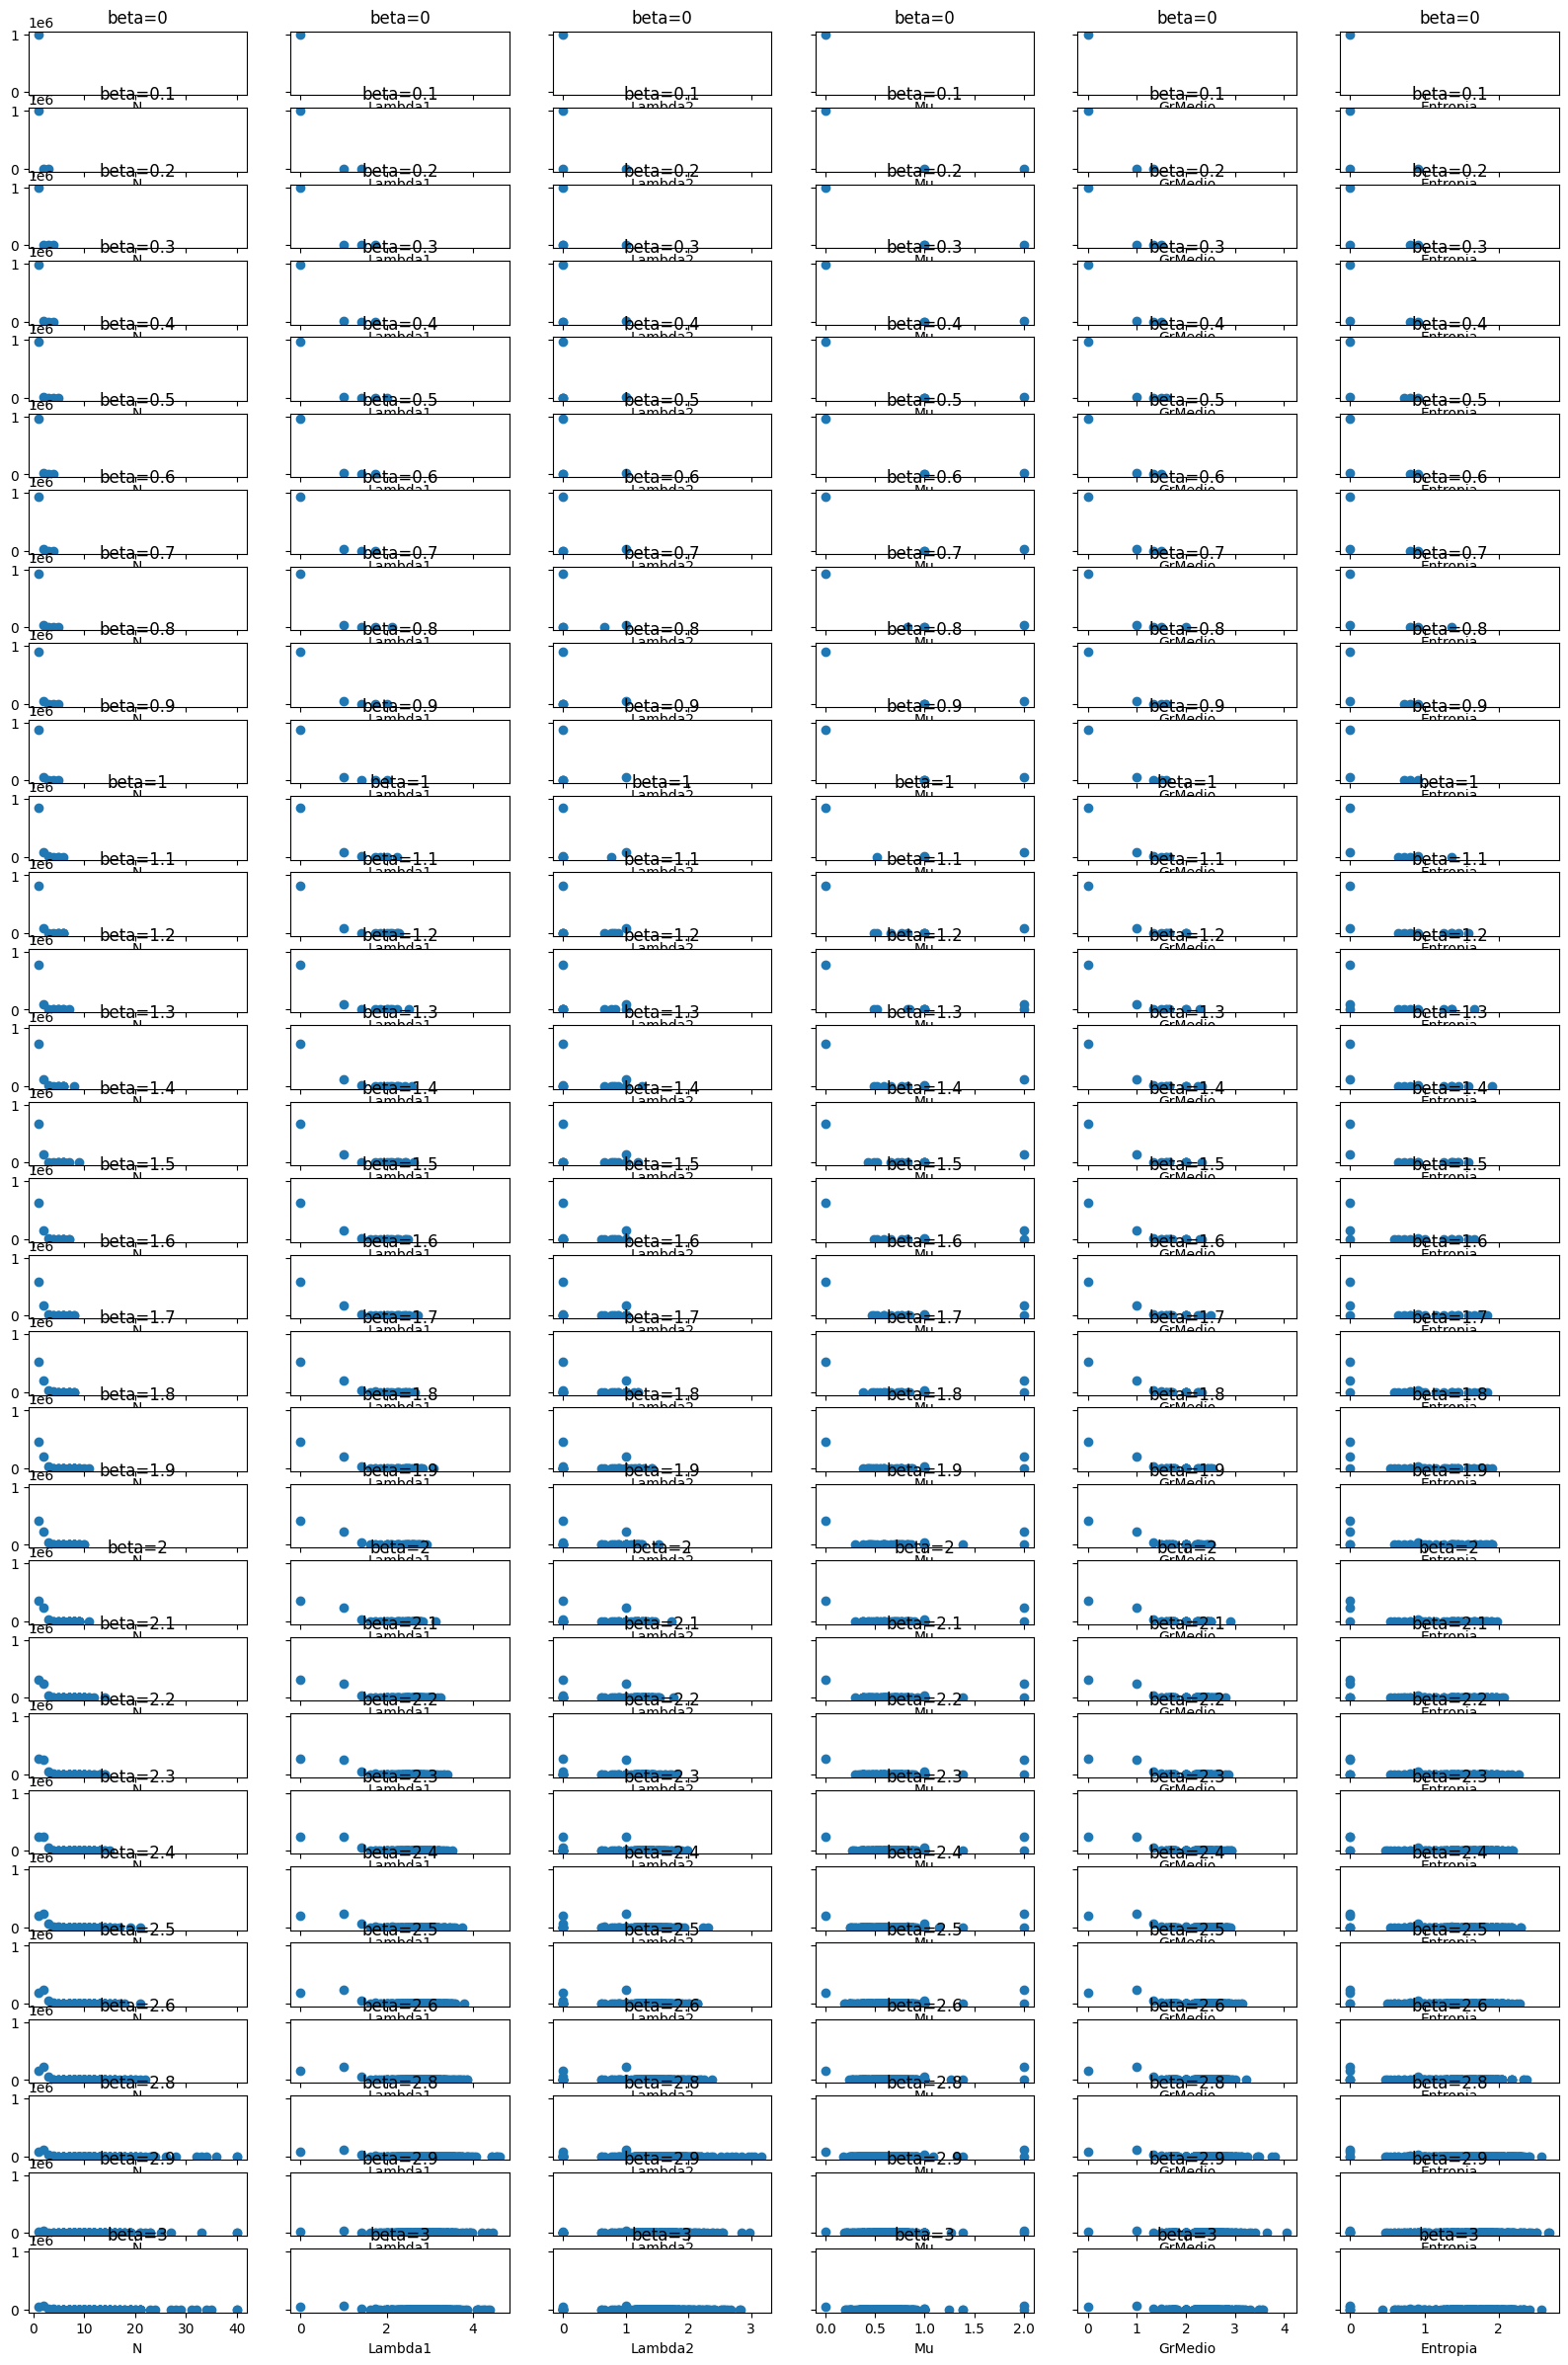

In [13]:
fig,axs = plt.subplots(30, 6, sharex='col', sharey=True, figsize=(20,30))
for i, beta in enumerate(sorted(measures.keys())):
    table = measures[beta]
    for j, pred in enumerate(predictors):
        axs[i][j].scatter(table[pred], table['NumRep'])
        axs[i][j].set_title(f'beta={beta}')
        axs[i][j].set_xlabel(pred)

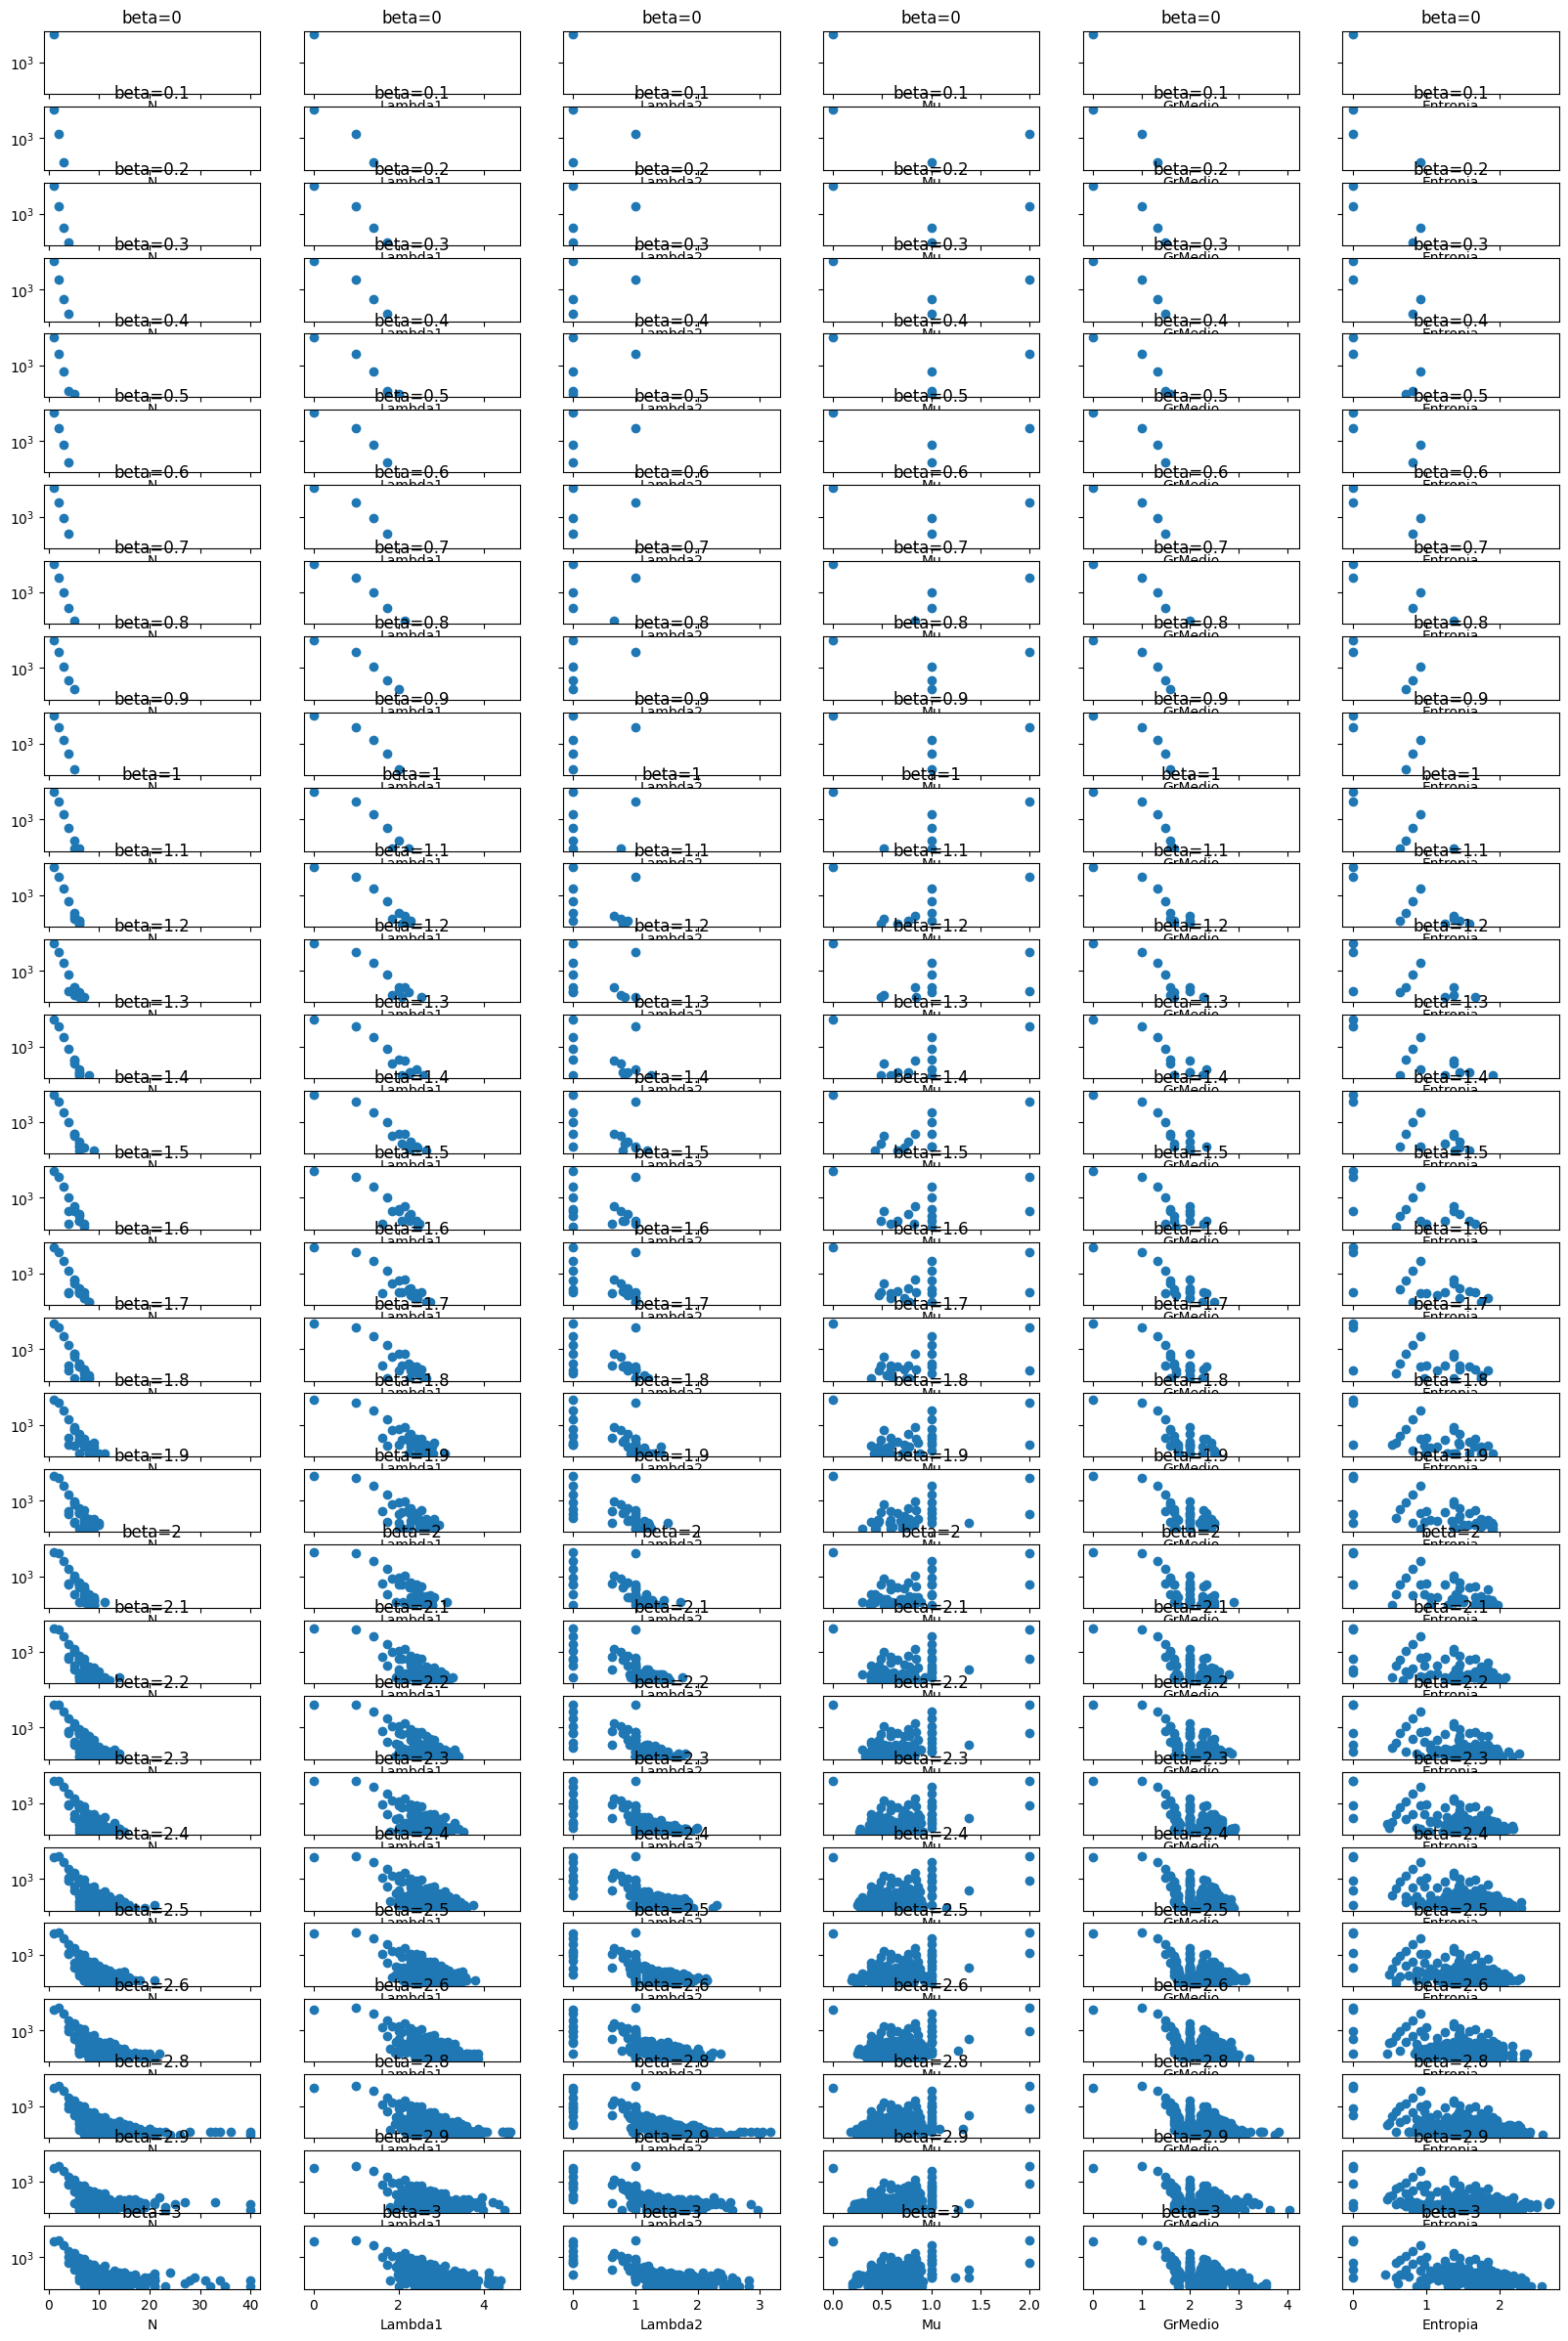

In [14]:
fig,axs = plt.subplots(30, 6, sharex='col', sharey='all', figsize=(20,30))
for i, beta in enumerate(sorted(measures.keys())):
    table = measures[beta]
    for j, pred in enumerate(predictors):
        axs[i][j].scatter(table[pred], table['NumRep'])
        axs[i][j].set_title(f'beta={beta}')
        axs[i][j].set_xlabel(pred)
        axs[i][j].set_yscale('log')

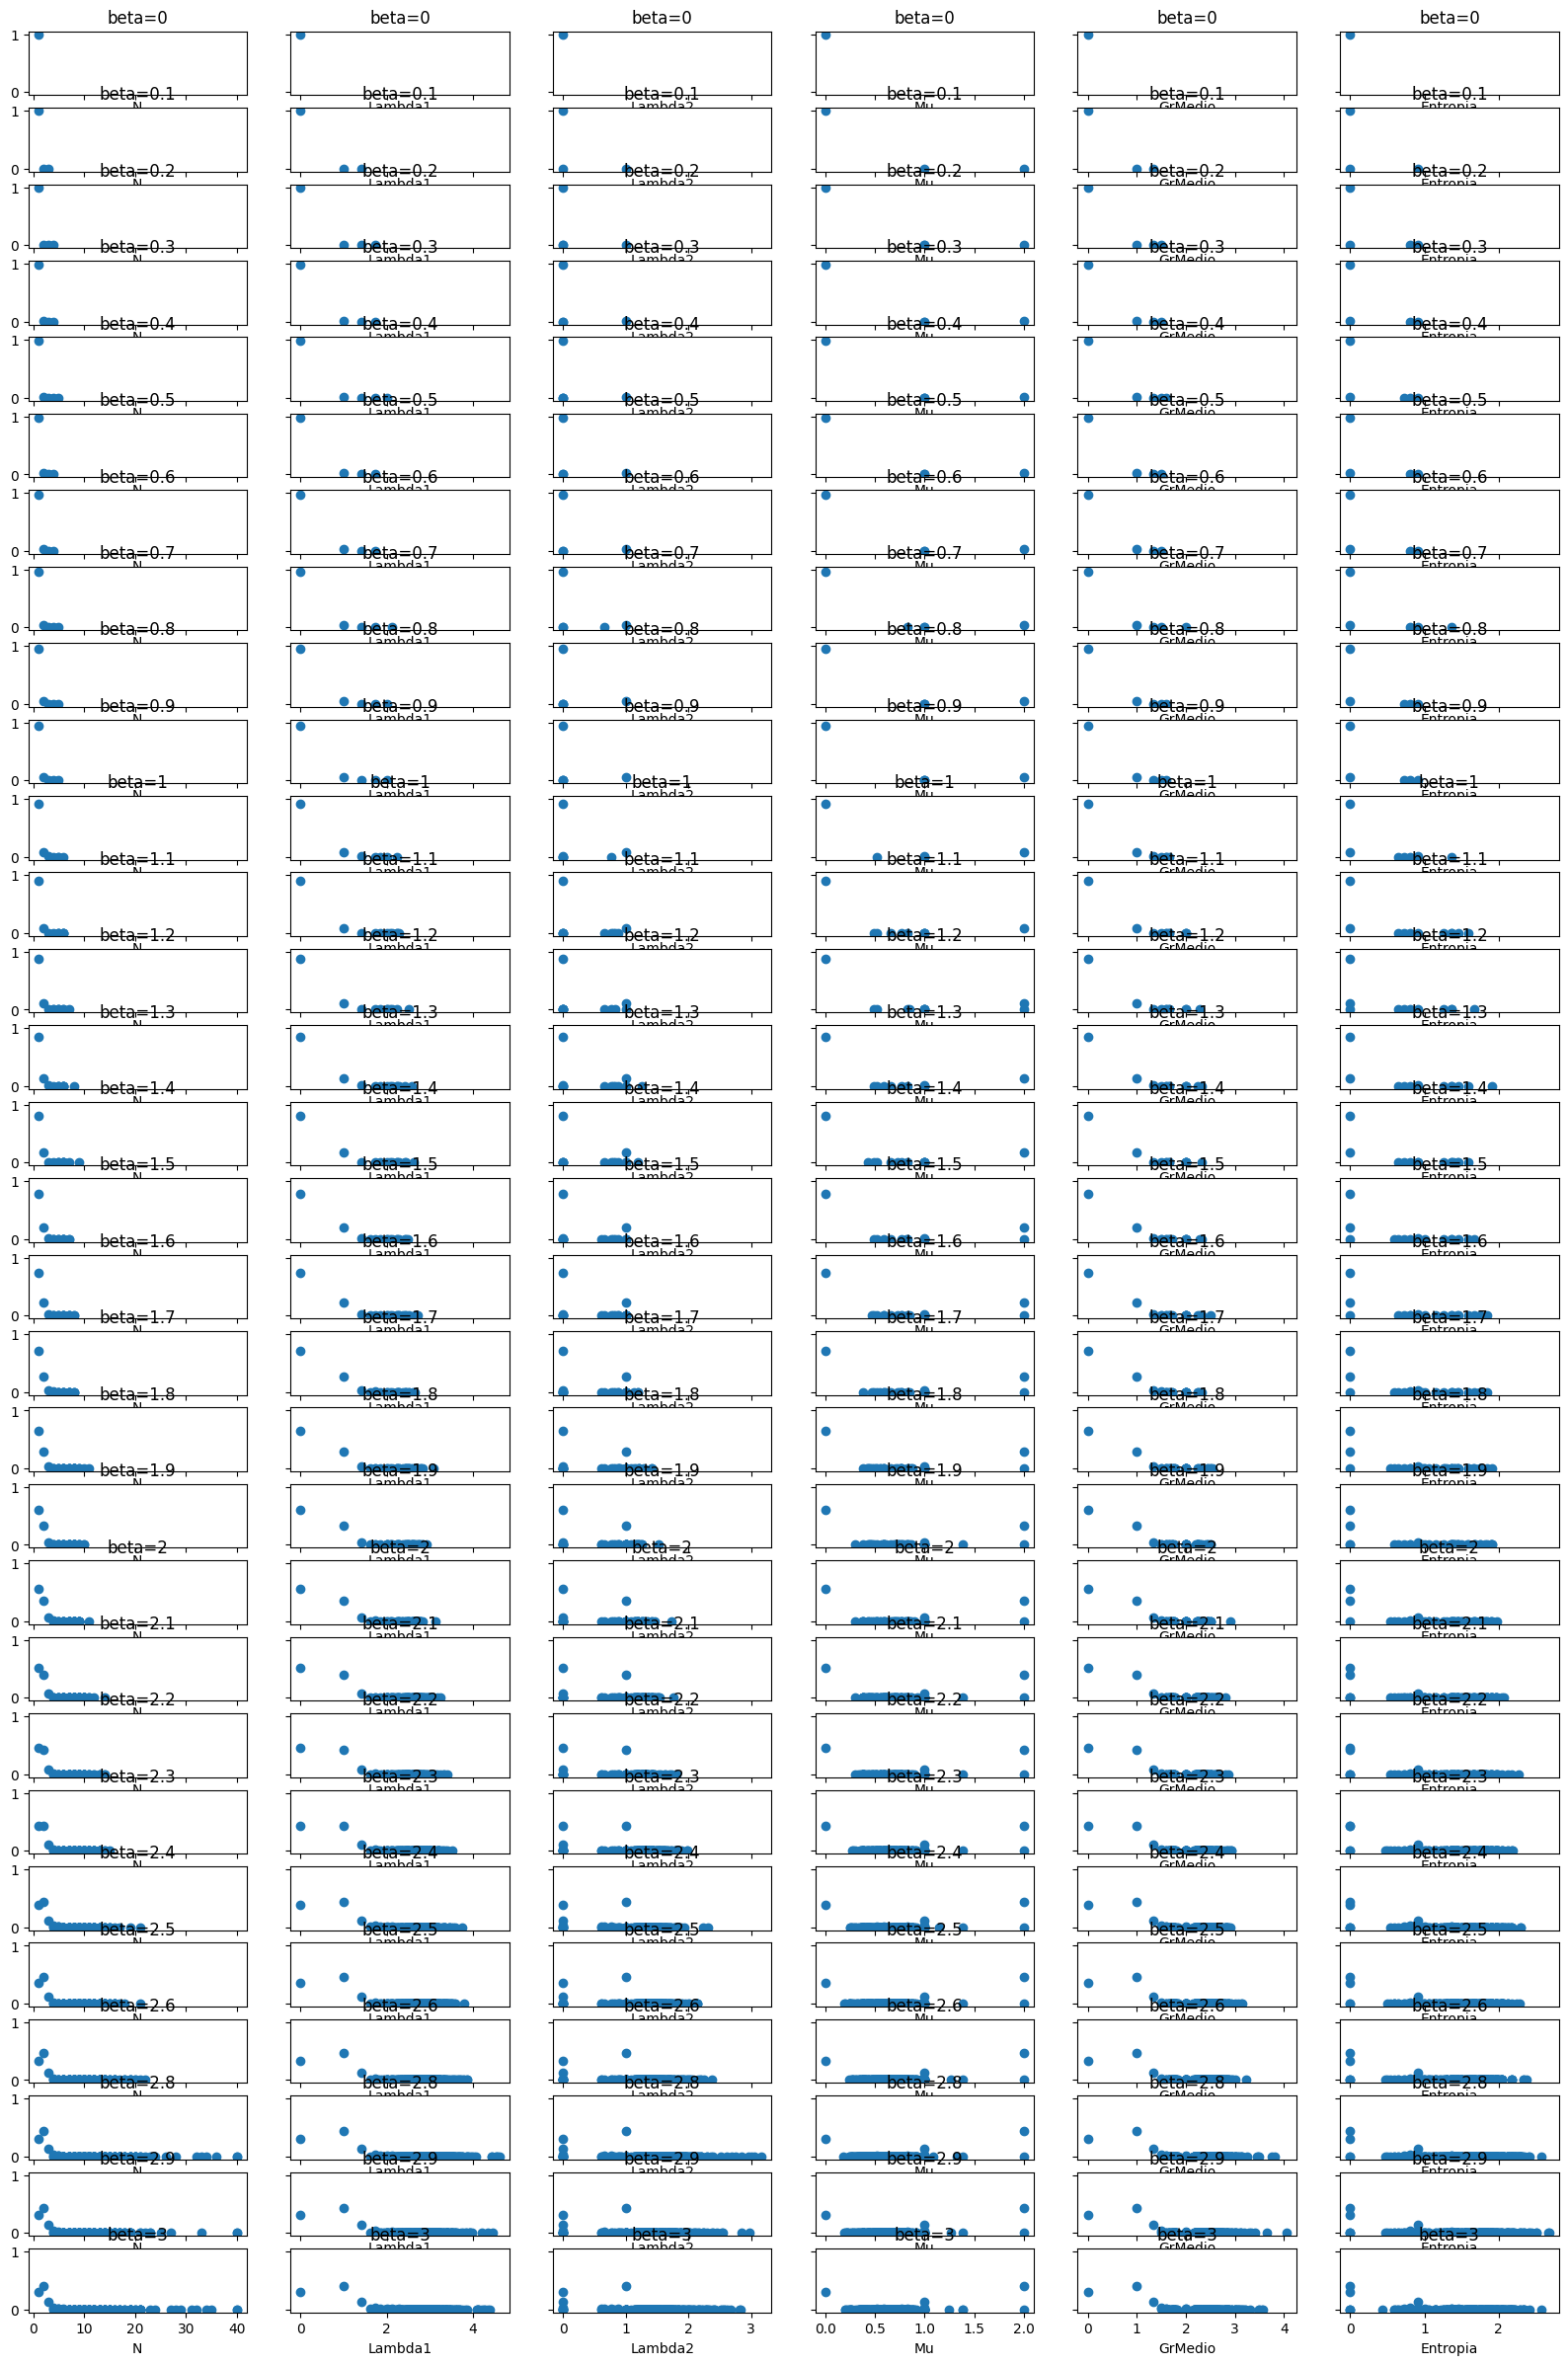

In [15]:
fig,axs = plt.subplots(30, 6, sharex='col', sharey='all', figsize=(20,30))
for i, beta in enumerate(sorted(measures.keys())):
    table = measures[beta]
    for j, pred in enumerate(predictors):
        axs[i][j].scatter(table[pred], table['p'])
        axs[i][j].set_title(f'beta={beta}')
        axs[i][j].set_xlabel(pred)

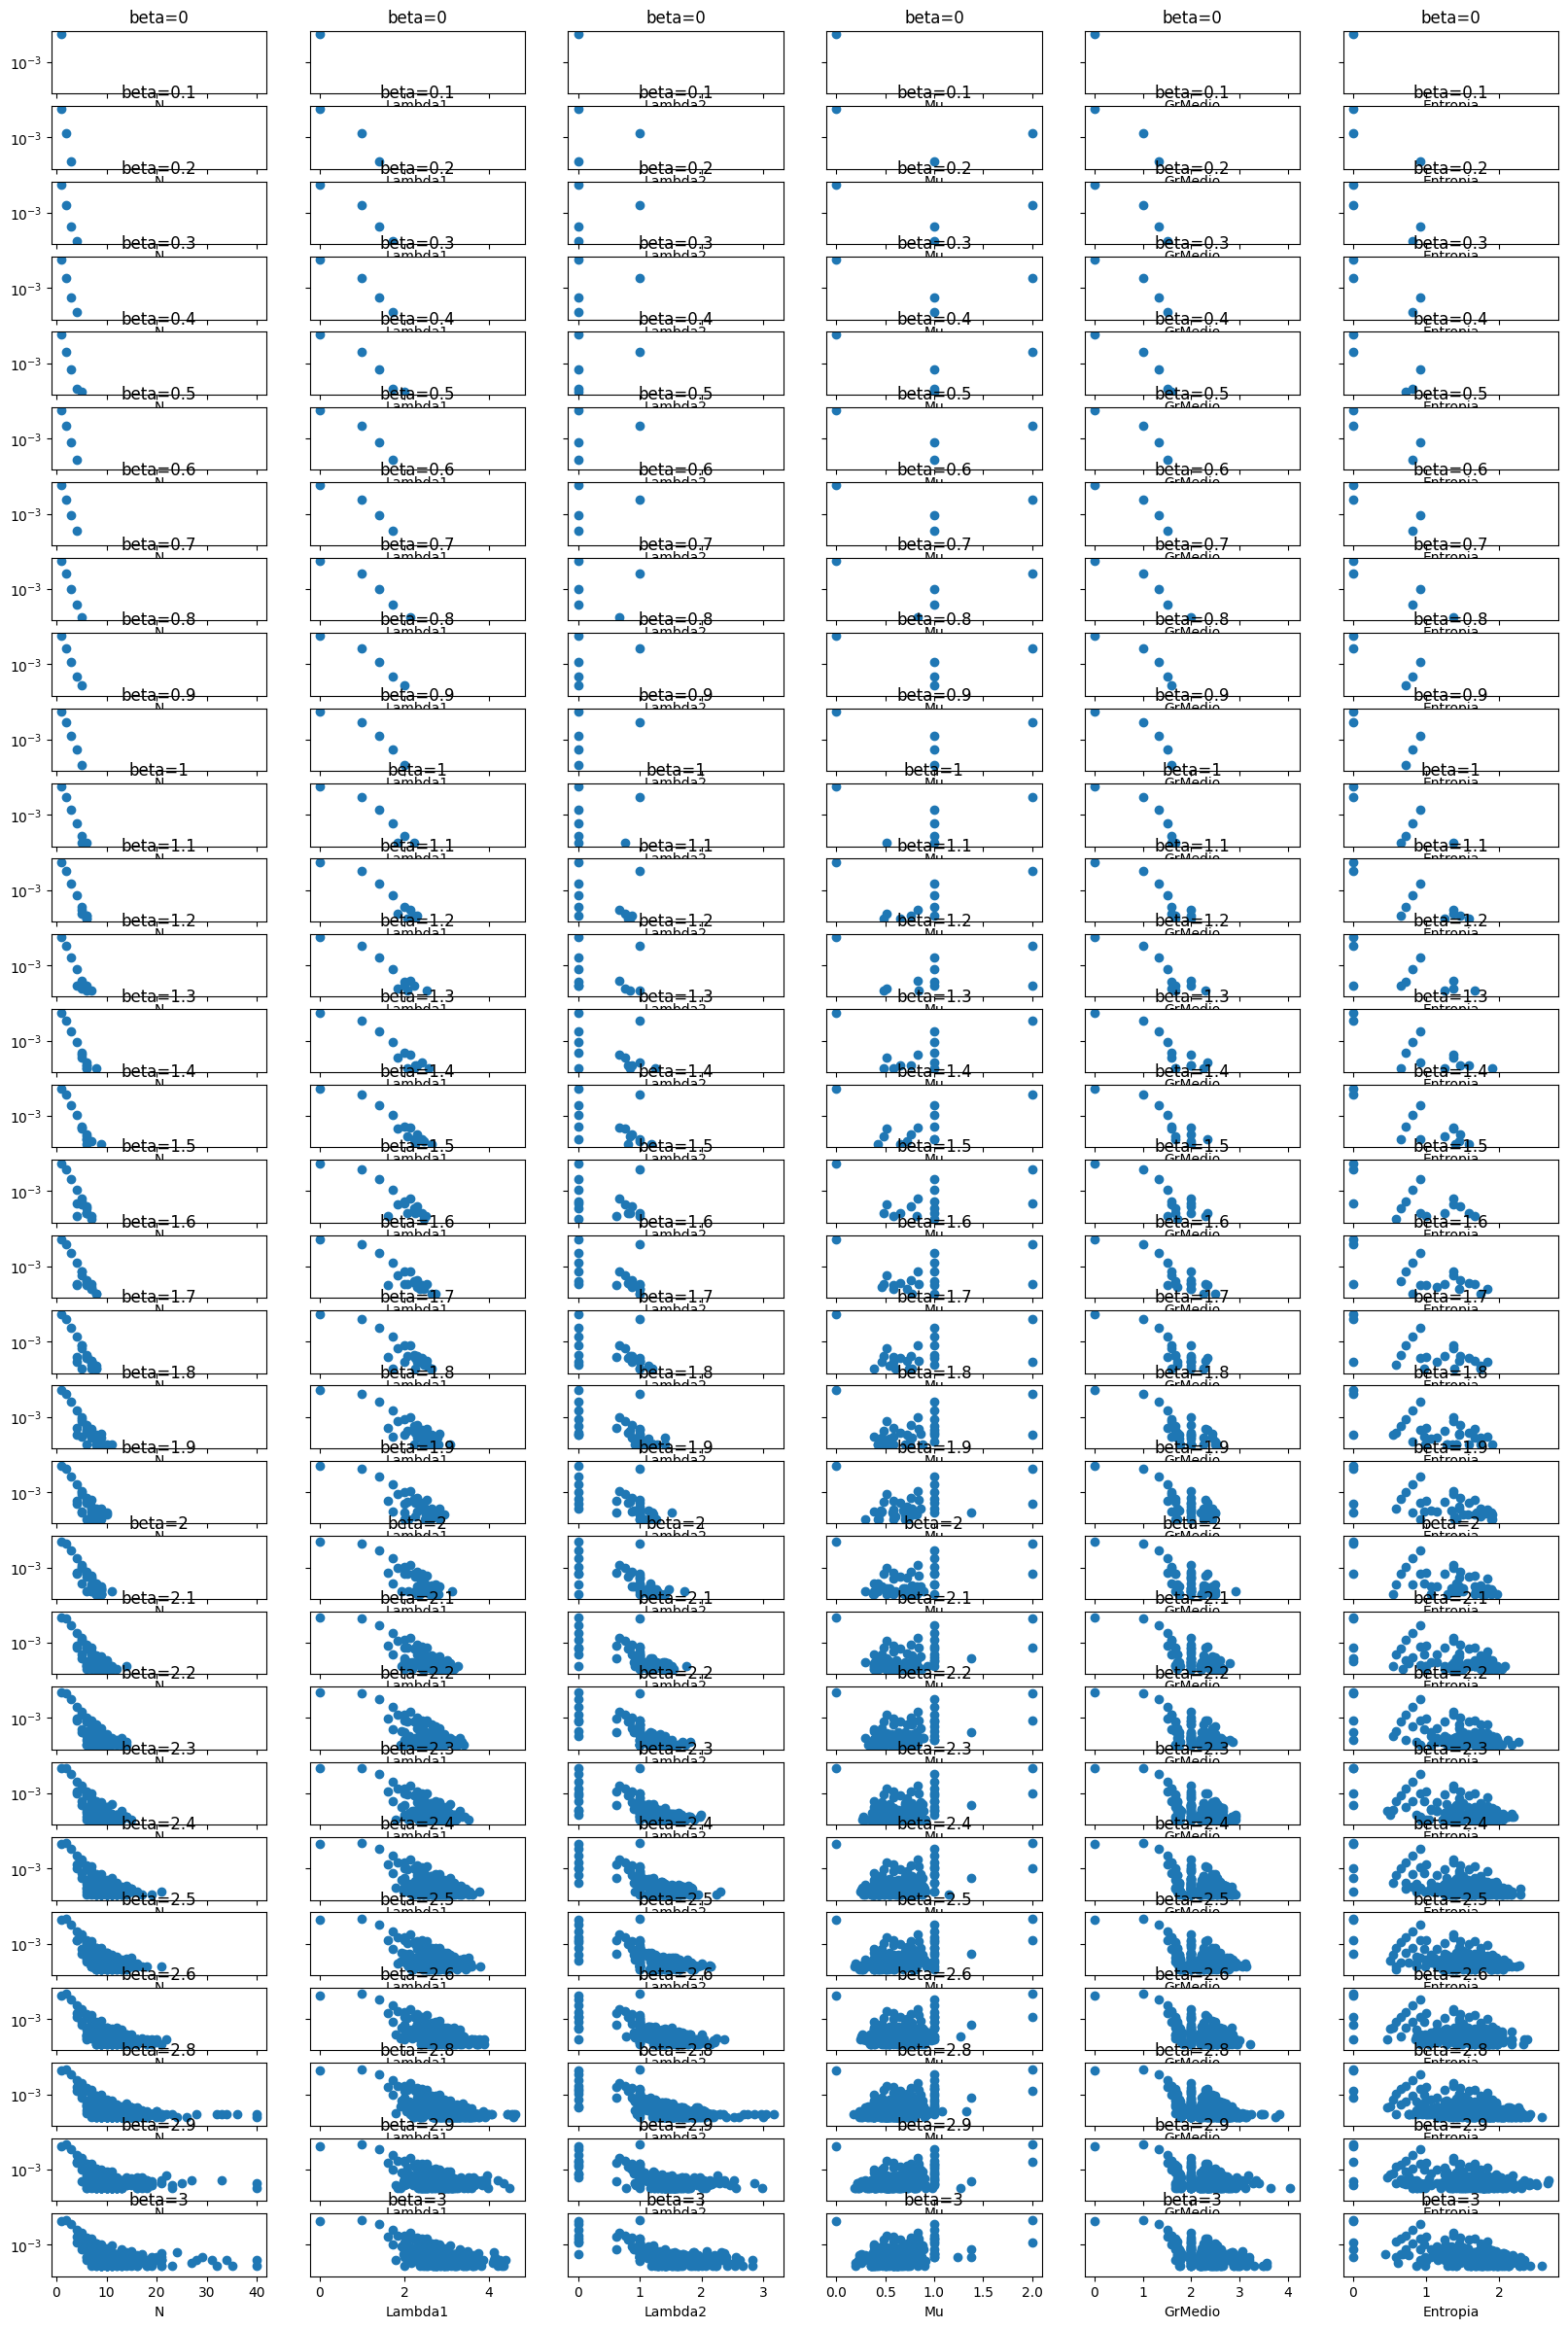

In [17]:
fig,axs = plt.subplots(30, 6, sharex='col', sharey='all', figsize=(20,30))
for i, beta in enumerate(sorted(measures.keys())):
    table = measures[beta]
    for j, pred in enumerate(predictors):
        axs[i][j].scatter(table[pred], table['p'])
        axs[i][j].set_title(f'beta={beta}')
        axs[i][j].set_xlabel(pred)
        axs[i][j].set_yscale('log')

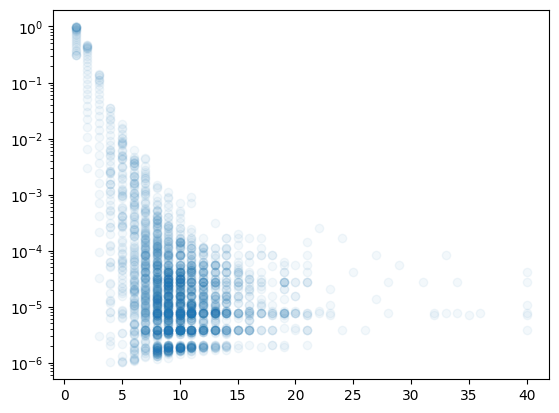

In [10]:
for i, beta in enumerate(sorted(measures.keys())):
    table = measures[beta]
    plt.scatter(table['N'], table['p'], alpha=0.05, color='tab:blue')
    plt.yscale('log')

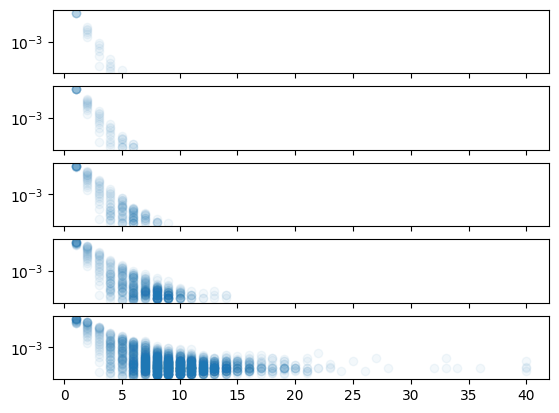

In [11]:
fig, axs = plt.subplots(5, sharex=True)
for z, beta_lim in enumerate([0.7,1.2,1.8,2.3,3]):
    for i, beta in enumerate(sorted(measures.keys())):
        if beta < beta_lim:
            table = measures[beta]
            axs[z].scatter(table['N'], table['p'], alpha=0.05, color='tab:blue')
            axs[z].set_yscale('log')

$\beta=2.2$

In [4]:
beta=2.2
X = measures[beta][predictors]
y = measures[beta]['plog']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, shuffle=True)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
error = lr.score(X_test, y_test)

print(error)

0.6470770317134303


(-14.0, -4.0)

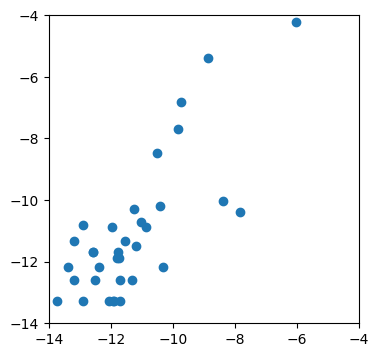

In [16]:
y_pred = lr.predict(X_test)
preds = np.array([y_pred,y_test]).T

plt.figure(figsize=(4,4))
plt.scatter(preds[:,0],preds[:,1])
plt.xlim(-14,-4)
plt.ylim(-14,-4)

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
error = rf.score(X_test, y_test)

print(error)

0.6680110851252232


(-14.0, -4.0)

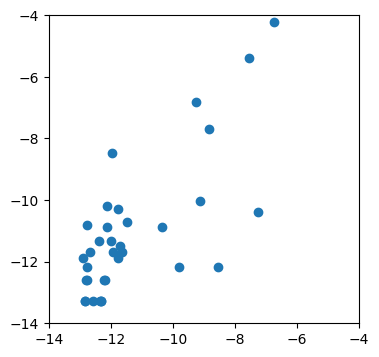

In [21]:
y_pred = rf.predict(X_test)
preds = np.array([y_pred,y_test]).T

plt.figure(figsize=(4,4))
plt.scatter(preds[:,0],preds[:,1])
plt.xlim(-14,-4)
plt.ylim(-14,-4)

$\beta=1$

In [22]:
beta=1
X = measures[beta][predictors]
y = measures[beta]['plog']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, shuffle=True)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
error = lr.score(X_test, y_test)

print(error)

0.9759207491176322


(-14.0, -4.0)

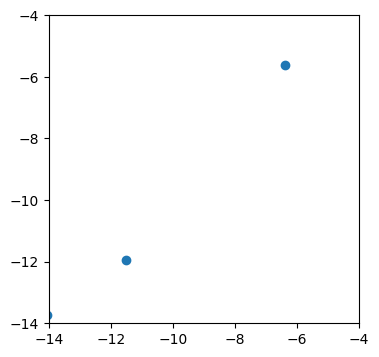

In [24]:
y_pred = lr.predict(X_test)
preds = np.array([y_pred,y_test]).T

plt.figure(figsize=(4,4))
plt.scatter(preds[:,0],preds[:,1])
plt.xlim(-14,-4)
plt.ylim(-14,-4)

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
error = rf.score(X_test, y_test)

print(error)

0.2779805600321934


(-14.0, -4.0)

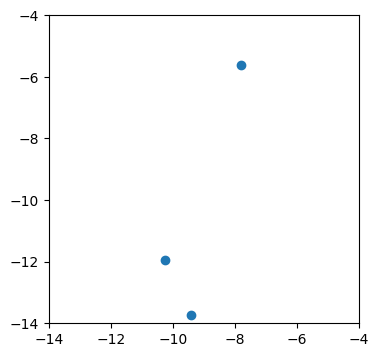

In [26]:
y_pred = rf.predict(X_test)
preds = np.array([y_pred,y_test]).T

plt.figure(figsize=(4,4))
plt.scatter(preds[:,0],preds[:,1])
plt.xlim(-14,-4)
plt.ylim(-14,-4)

$\beta=3$

In [5]:
beta=3
X = measures[beta][predictors]
y = measures[beta]['plog']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, shuffle=True)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
error = lr.score(X_test, y_test)

print(error)

0.1911148409659834


(-14.0, -4.0)

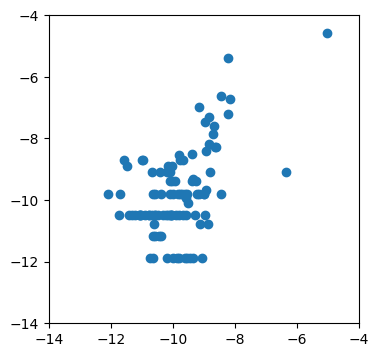

In [7]:
y_pred = lr.predict(X_test)
preds = np.array([y_pred,y_test]).T

plt.figure(figsize=(4,4))
plt.scatter(preds[:,0],preds[:,1])
plt.xlim(-14,-4)
plt.ylim(-14,-4)

In [8]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
error = rf.score(X_test, y_test)

print(error)

0.27152513690846825


(-14.0, -4.0)

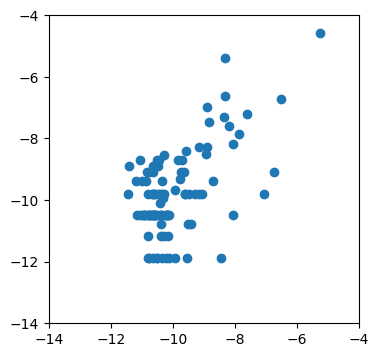

In [9]:
y_pred = rf.predict(X_test)
preds = np.array([y_pred,y_test]).T

plt.figure(figsize=(4,4))
plt.scatter(preds[:,0],preds[:,1])
plt.xlim(-14,-4)
plt.ylim(-14,-4)